
<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ;  text-align : center; background-color : #08f9f9; border-radius: 5px 5px;"><strong>Logistic Regression (Diabetes)</strong></p> 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10, 6)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


##### DiabetesPedigreeFunction: diabetes history in relatives
##### BMI: Body mass index

In [4]:
df.shape

(768, 9)

## Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

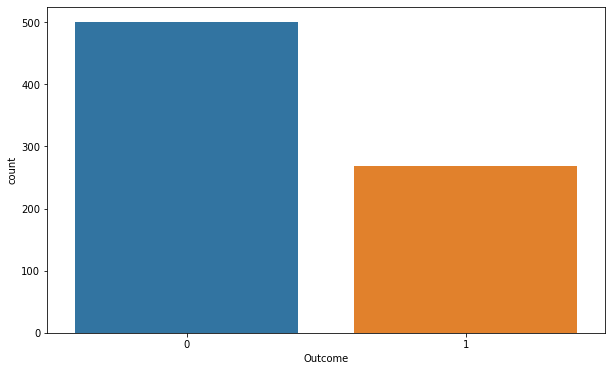

In [8]:
sns.countplot(df.Outcome);

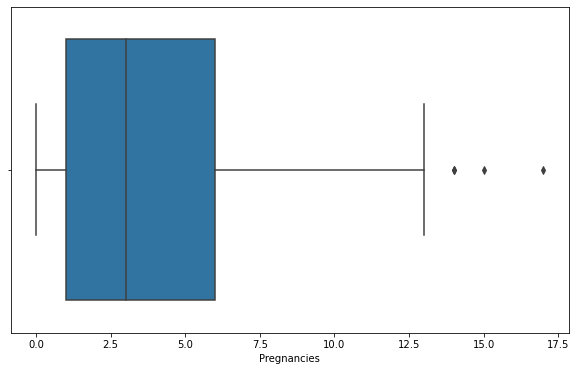

In [9]:
sns.boxplot(df.Pregnancies);

In [19]:
df = df[df.Pregnancies < 13]

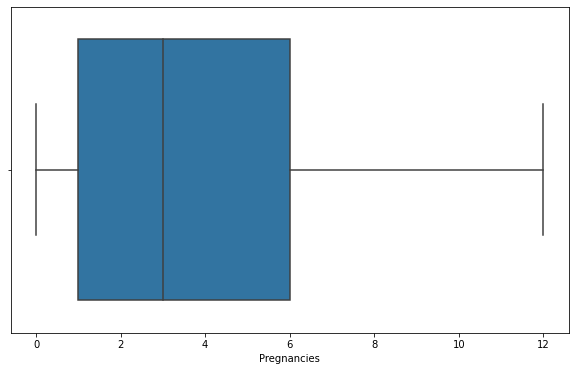

In [20]:
sns.boxplot(df.Pregnancies);

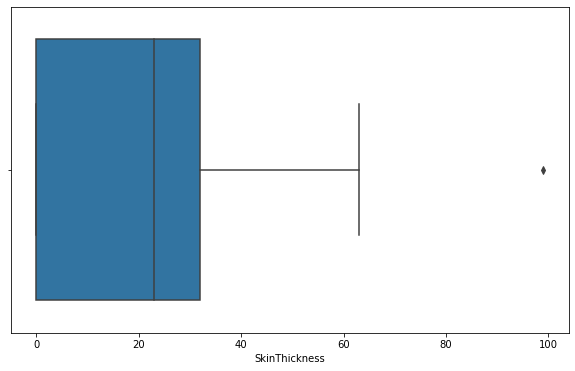

In [11]:
sns.boxplot(df.SkinThickness);

In [12]:
df = df[df.SkinThickness < 70]

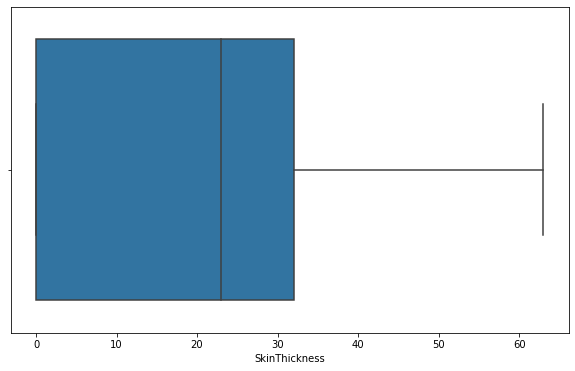

In [13]:
sns.boxplot(df.SkinThickness);

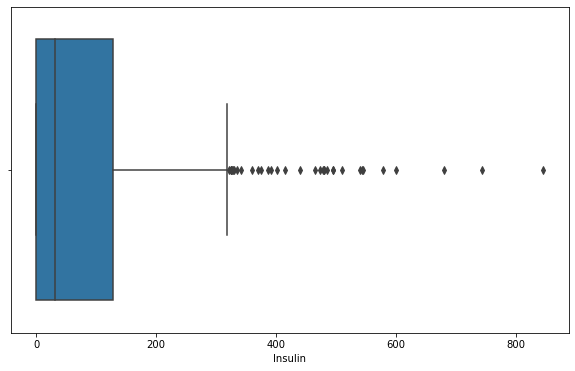

In [14]:
sns.boxplot(df.Insulin);

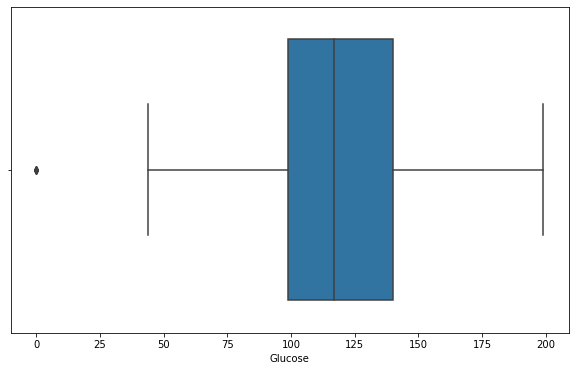

In [15]:
sns.boxplot(df.Glucose);

In [16]:
df = df[df.Glucose > 0]

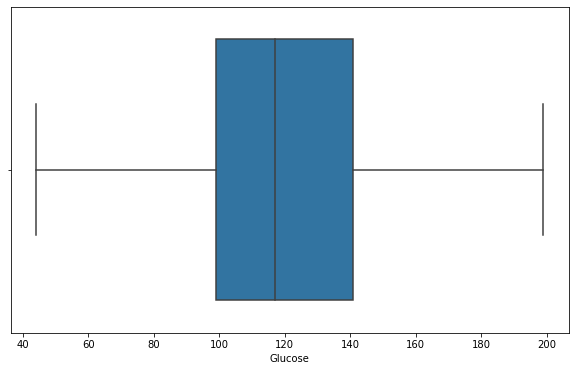

In [17]:
sns.boxplot(df.Glucose);

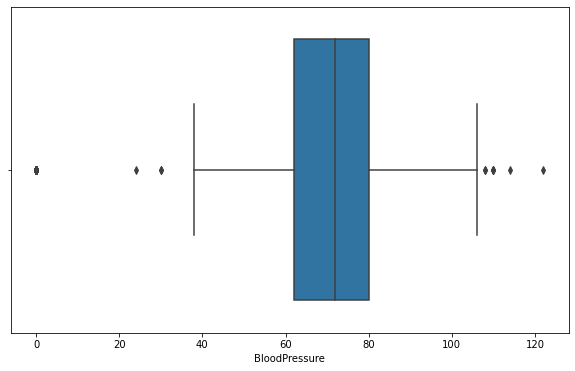

In [18]:
sns.boxplot(df.BloodPressure);

In [21]:
df = df[df.BloodPressure > 35]

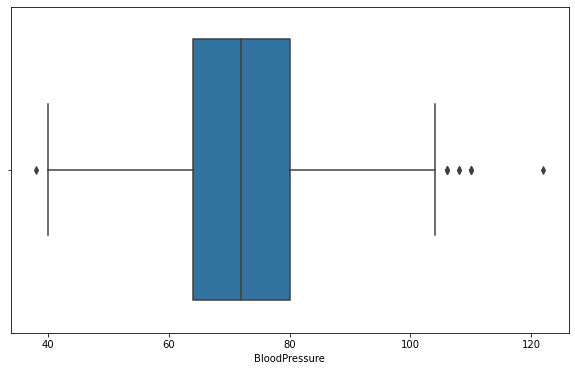

In [22]:
sns.boxplot(df.BloodPressure);

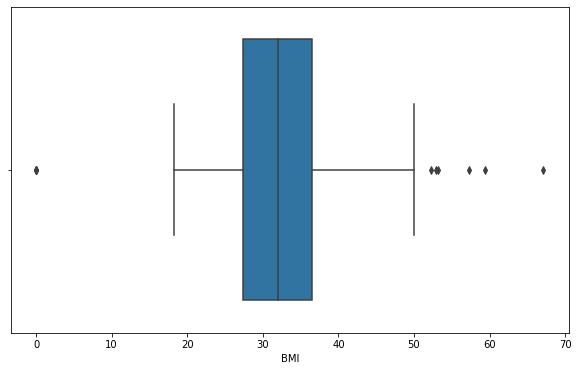

In [23]:
sns.boxplot(df.BMI);

In [24]:
df = df[df.BMI > 0]

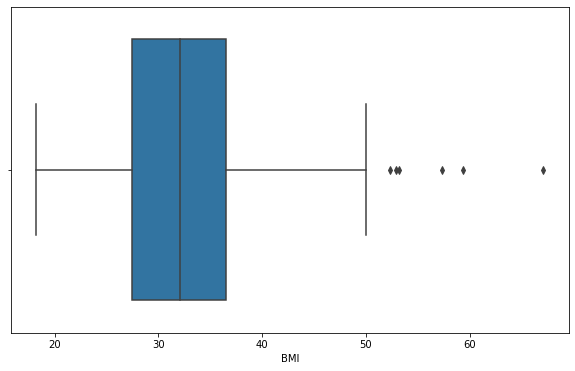

In [25]:
sns.boxplot(df.BMI);

In [26]:
df.shape

(707, 9)

In [27]:
df.Outcome.value_counts()

0    468
1    239
Name: Outcome, dtype: int64

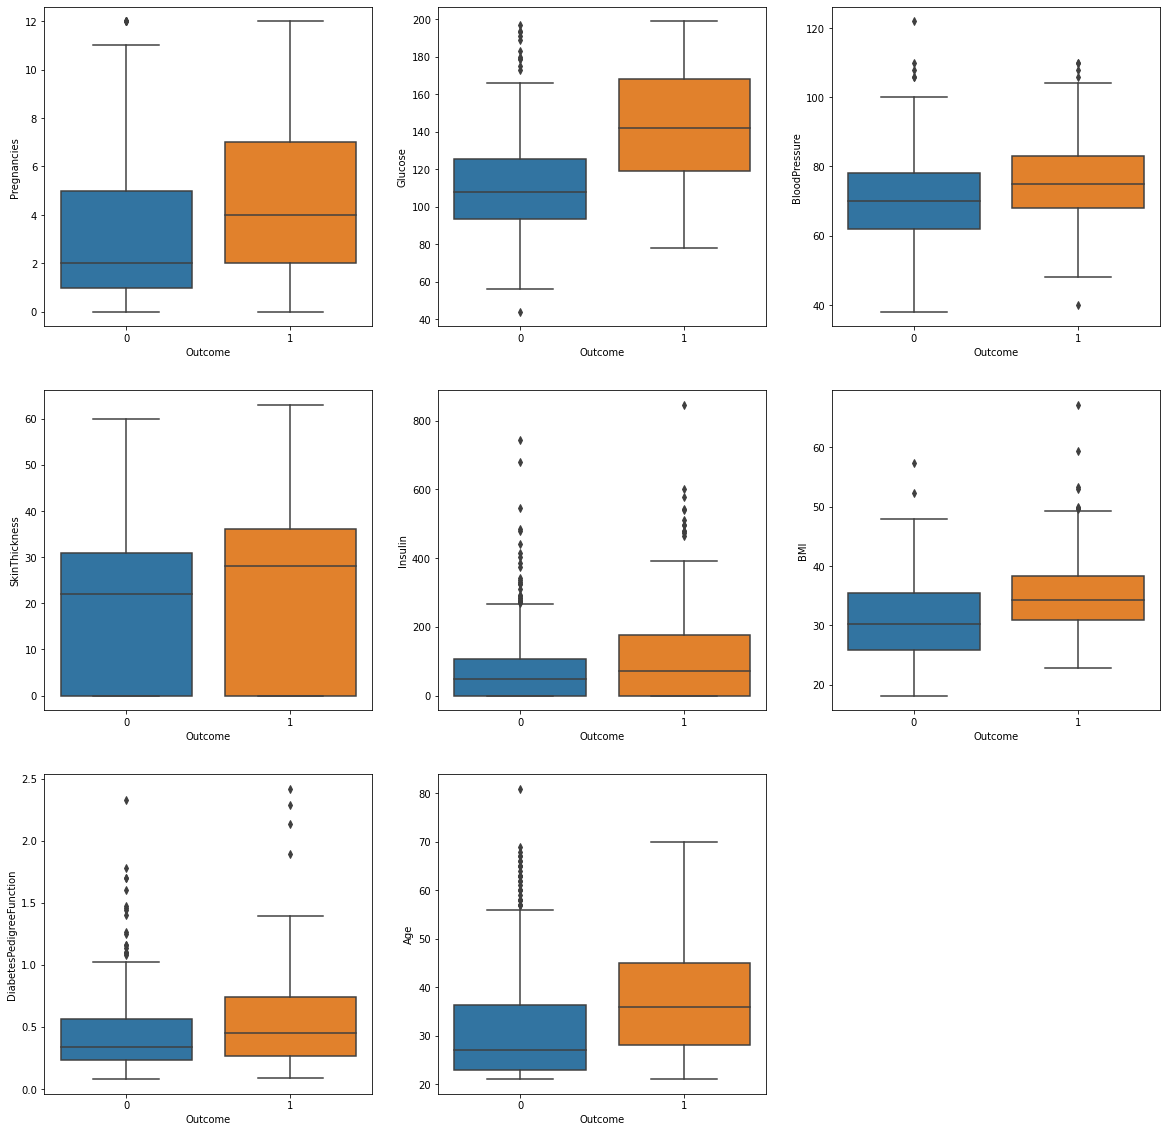

In [28]:
index = 0
plt.figure(figsize=(20, 20))

for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3, 3, index)
        sns.boxplot(x='Outcome', y=feature, data=df)

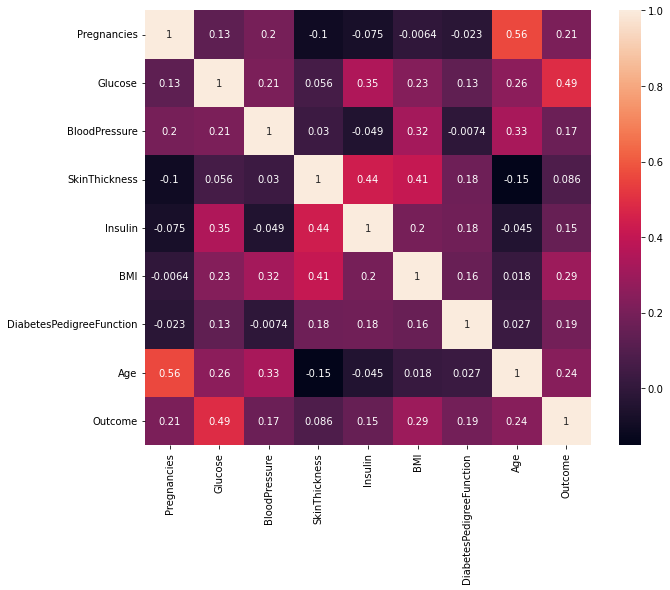

In [29]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), annot=True);

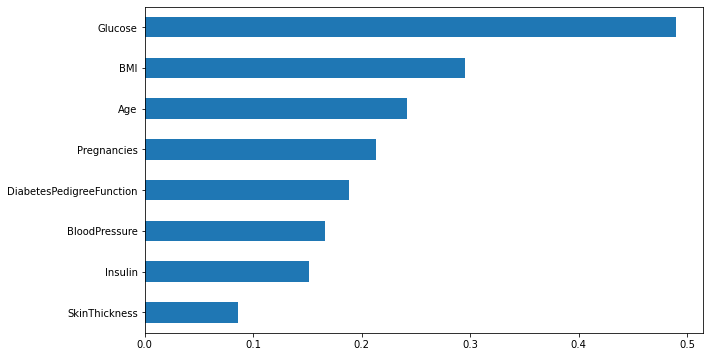

In [30]:
# df.corr()
# df.corr()["Outcome"].sort_values().plot.barh()
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh();

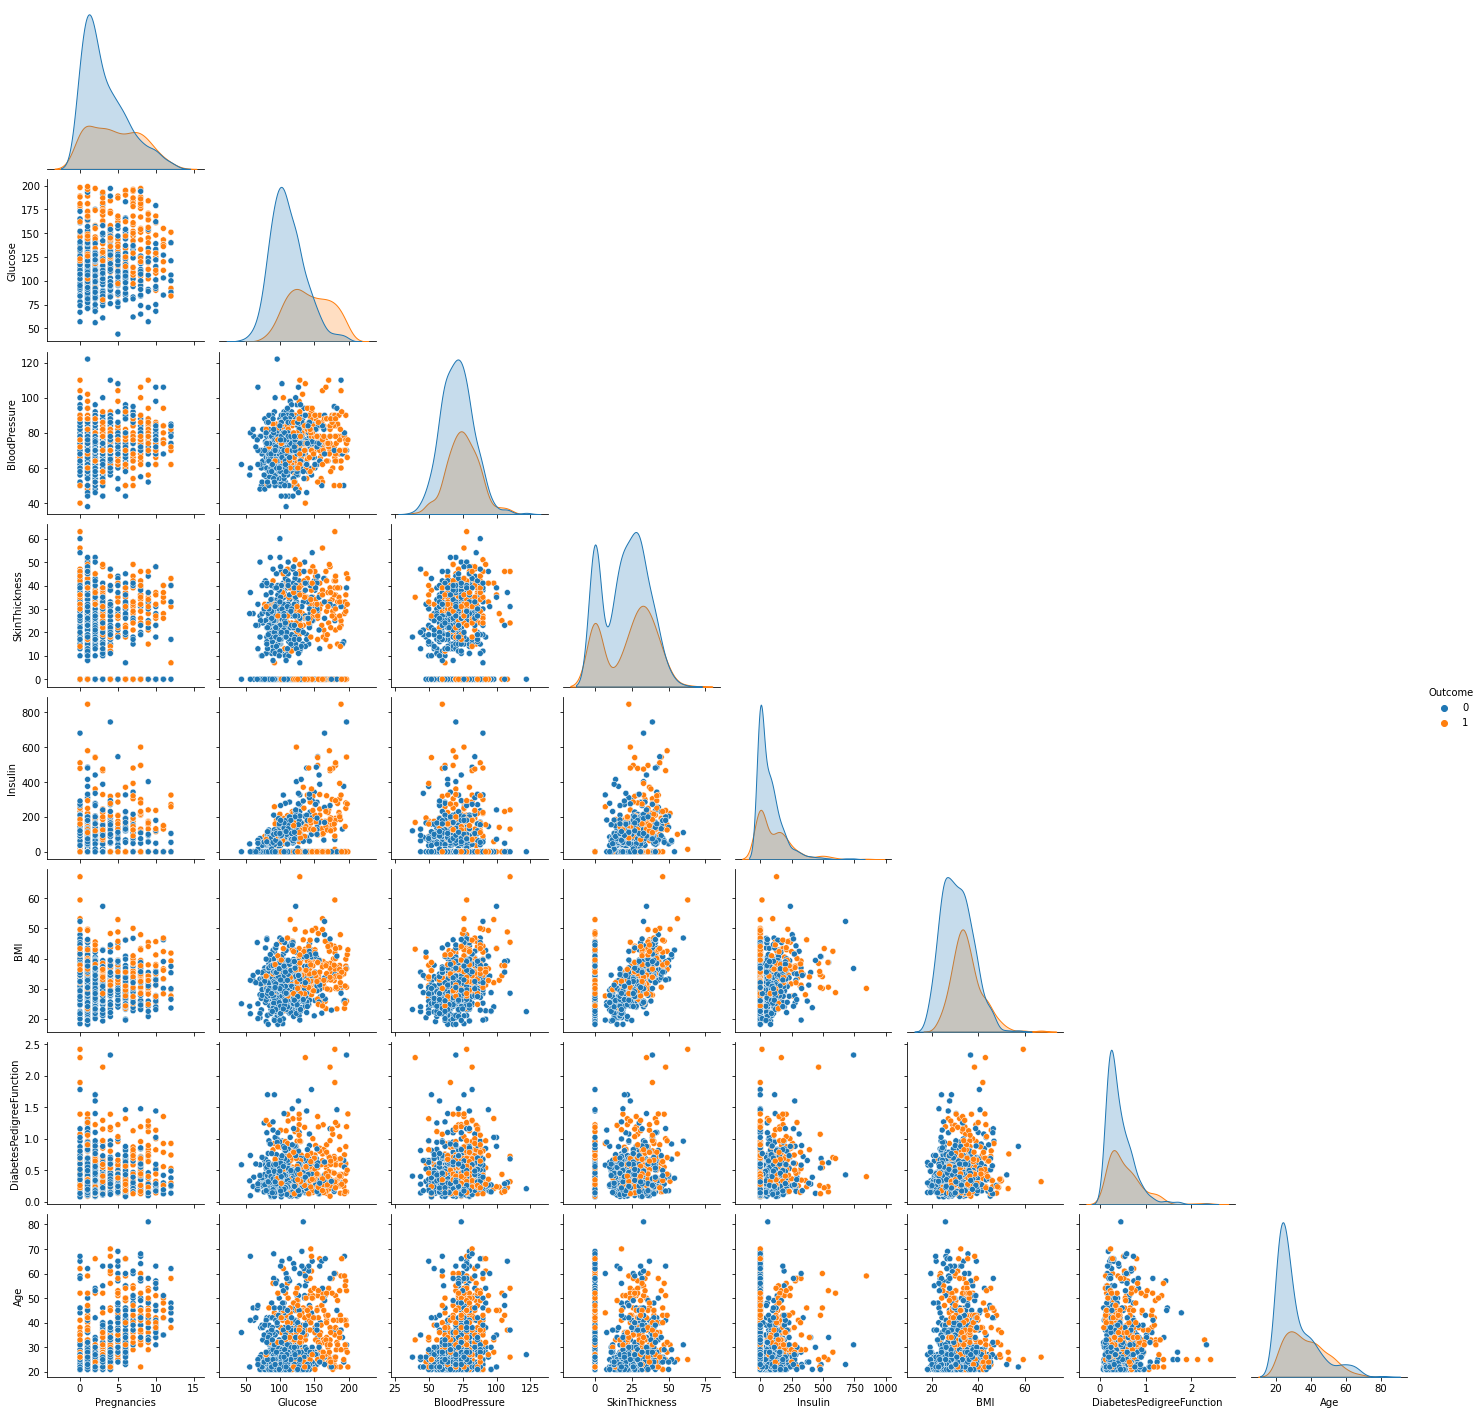

In [32]:
sns.pairplot(df, hue="Outcome", corner=True);

## Train | Test Split and Scaling

In [33]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=42)

# stratify is parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.
# For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, 
# stratify=y will make sure that your random split has 25% of 0's and 75% of 1's

In [36]:
scaler = StandardScaler()

In [37]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log_model = LogisticRegression()

In [40]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [41]:
y_pred = log_model.predict(X_test_scaled)

In [42]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [43]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
69,4,146,85,27,100,28.900,0.189,27,0,0,0.324
83,0,101,65,28,0,24.600,0.237,22,0,0,0.050
97,1,71,48,18,76,20.400,0.323,22,0,0,0.012
437,5,147,75,0,0,29.900,0.434,28,0,0,0.427
0,6,148,72,35,0,33.600,0.627,50,1,1,0.756
628,5,128,80,0,0,34.600,0.144,45,0,0,0.392
667,10,111,70,27,0,27.500,0.141,40,1,0,0.228
48,7,103,66,32,0,39.100,0.344,31,1,0,0.321
210,2,81,60,22,0,27.700,0.290,25,0,0,0.040
263,3,142,80,15,0,32.400,0.200,63,0,1,0.590


## Model Performance on Classification Tasks

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------")
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [46]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[84 10]
 [21 27]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        94
           1       0.73      0.56      0.64        48

    accuracy                           0.78       142
   macro avg       0.76      0.73      0.74       142
weighted avg       0.78      0.78      0.77       142


Train_Set
[[330  44]
 [ 82 109]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       374
           1       0.71      0.57      0.63       191

    accuracy                           0.78       565
   macro avg       0.76      0.73      0.74       565
weighted avg       0.77      0.78      0.77       565



## Cross Validate

In [47]:
from sklearn.model_selection import cross_validate

In [48]:
model = LogisticRegression()

scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=['precision', 'recall', 'f1', 'accuracy'],
                        cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.007,0.004,0.611,0.579,0.595,0.737
2,0.005,0.008,0.600,0.474,0.529,0.719
3,0.007,0.009,0.636,0.737,0.683,0.772
4,0.004,0.004,1.000,0.526,0.690,0.842
5,0.004,0.003,0.800,0.600,0.686,0.807
6,0.003,0.002,0.688,0.579,0.629,0.768
7,0.003,0.003,0.846,0.579,0.688,0.821
8,0.003,0.003,0.667,0.421,0.516,0.732
9,0.003,0.003,0.818,0.474,0.600,0.786
10,0.003,0.002,0.667,0.632,0.649,0.768


In [49]:
df_scores.mean()[2:]

test_precision   0.733
test_recall      0.560
test_f1          0.626
test_accuracy    0.775
dtype: float64

In [50]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[84 10]
 [21 27]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        94
           1       0.73      0.56      0.64        48

    accuracy                           0.78       142
   macro avg       0.76      0.73      0.74       142
weighted avg       0.78      0.78      0.77       142


Train_Set
[[330  44]
 [ 82 109]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       374
           1       0.71      0.57      0.63       191

    accuracy                           0.78       565
   macro avg       0.76      0.73      0.74       565
weighted avg       0.77      0.78      0.77       565



## Cross Validate for 0 class

In [51]:
import sklearn

sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [52]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label=0)
precision_0 = make_scorer(precision_score, pos_label=0)
recall_0 = make_scorer(recall_score, pos_label=0)

In [53]:
model = LogisticRegression()

scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring={
                            "precision_0": precision_0,
                            "recall_0": recall_0,
                            "f1_0": f1_0
                        },
                        cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores

,fit_time,score_time,test_precision_0,test_recall_0,test_f1_0
1,0.019,0.008,0.795,0.816,0.805
2,0.004,0.003,0.762,0.842,0.800
3,0.003,0.008,0.857,0.789,0.822
4,0.004,0.004,0.809,1.000,0.894
5,0.007,0.003,0.810,0.919,0.861
6,0.004,0.005,0.800,0.865,0.831
7,0.005,0.003,0.814,0.946,0.875
8,0.005,0.003,0.750,0.892,0.815
9,0.003,0.003,0.778,0.946,0.854
10,0.003,0.003,0.816,0.838,0.827


In [54]:
df_scores.mean()[2:]

test_precision_0   0.799
test_recall_0      0.885
test_f1_0          0.838
dtype: float64

In [55]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[84 10]
 [21 27]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        94
           1       0.73      0.56      0.64        48

    accuracy                           0.78       142
   macro avg       0.76      0.73      0.74       142
weighted avg       0.78      0.78      0.77       142


Train_Set
[[330  44]
 [ 82 109]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       374
           1       0.71      0.57      0.63       191

    accuracy                           0.78       565
   macro avg       0.76      0.73      0.74       565
weighted avg       0.77      0.78      0.77       565



## GridSearchCV

In [56]:
import sklearn

sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [57]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight = ["balanced", None]
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {
    "penalty": penalty,
    "C": C,
    "class_weight": class_weight,
    "solver": solver
}

grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring="recall",  #f1_0 = make_scorer(f1_score, pos_label =0)
    n_jobs=-1)

In [58]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [59]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [65]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[76 19]
 [13 36]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        95
           1       0.65      0.73      0.69        49

    accuracy                           0.78       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.78      0.78       144


Train_Set
[[288  90]
 [ 49 149]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       378
           1       0.62      0.75      0.68       198

    accuracy                           0.76       576
   macro avg       0.74      0.76      0.74       576
weighted avg       0.78      0.76      0.76       576



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e

In [60]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

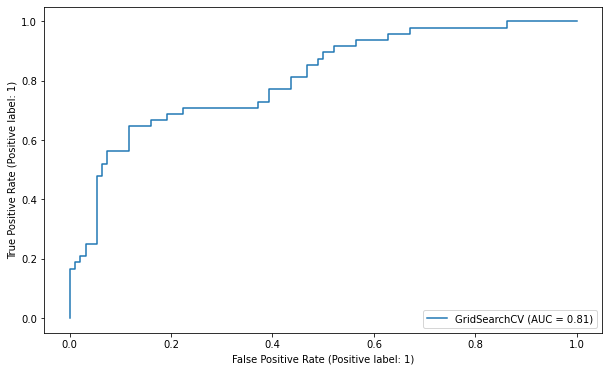

In [61]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

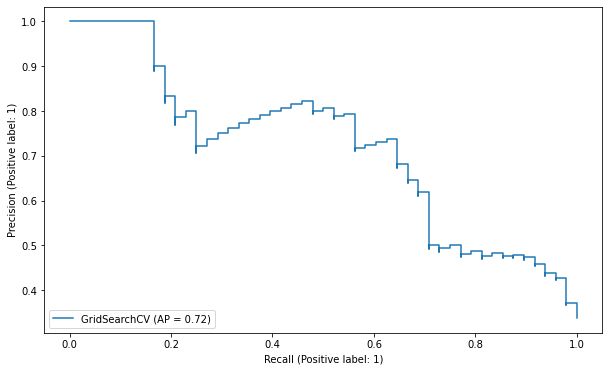

In [62]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

## Finding Best Threshold for max recall score

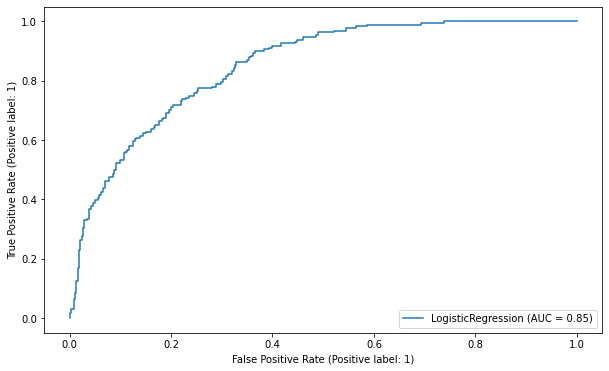

In [63]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [64]:
y_pred_proba = log_model.predict_proba(X_train_scaled)

roc_auc_score(y_train, y_pred_proba[:, 1])

0.8493014530895652

In [65]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:, 1])

In [66]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.24606460389866572

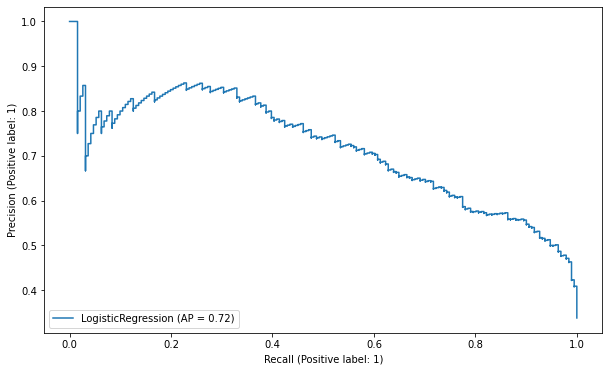

In [67]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);

In [68]:
y_pred_proba = log_model.predict_proba(X_train_scaled)

average_precision_score(y_train, y_pred_proba[:, 1])

0.7154210984828269

In [69]:
precisions, recalls, thresholds = precision_recall_curve(
    y_train, y_pred_proba[:, 1])

In [70]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.24606460389866572

In [71]:
grid_model.predict_proba(X_test_scaled)[:, 1]

array([0.87662369, 0.39482486, 0.246597  , 0.80804918, 0.38144009,
       0.56961716, 0.29876877, 0.60580407, 0.85588172, 0.47147813,
       0.11586663, 0.11057349, 0.50064289, 0.30547393, 0.5461745 ,
       0.45352846, 0.27747573, 0.50913189, 0.75185135, 0.33071276,
       0.92006079, 0.6106697 , 0.23462779, 0.35274506, 0.12373313,
       0.7136867 , 0.07048049, 0.17925704, 0.59627024, 0.93302177,
       0.35397158, 0.40330378, 0.32497683, 0.44877972, 0.92075768,
       0.86831154, 0.13957598, 0.80934817, 0.92696176, 0.62026073,
       0.76827731, 0.42197953, 0.50850569, 0.48750612, 0.86841033,
       0.26665604, 0.18556905, 0.8849325 , 0.46718346, 0.17165112,
       0.40952175, 0.87631649, 0.15347717, 0.46883849, 0.20649278,
       0.39935335, 0.04350502, 0.10152514, 0.83330707, 0.24566401,
       0.4405557 , 0.90316467, 0.85772138, 0.12123165, 0.38400088,
       0.21412921, 0.29971535, 0.50250323, 0.2799768 , 0.56623178,
       0.23603668, 0.68830451, 0.57926669, 0.61713846, 0.79528

In [72]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:, 1]).apply(
    lambda x: 1 if x >= optimal_threshold else 0)

In [73]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[36 58]
 [ 3 45]]
              precision    recall  f1-score   support

           0       0.92      0.38      0.54        94
           1       0.44      0.94      0.60        48

    accuracy                           0.57       142
   macro avg       0.68      0.66      0.57       142
weighted avg       0.76      0.57      0.56       142



In [74]:
y_train_pred2 = pd.Series(grid_model.predict_proba(
    X_train_scaled)[:, 1]).apply(lambda x: 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[144 230]
 [  2 189]]
              precision    recall  f1-score   support

           0       0.99      0.39      0.55       374
           1       0.45      0.99      0.62       191

    accuracy                           0.59       565
   macro avg       0.72      0.69      0.59       565
weighted avg       0.81      0.59      0.58       565



## Final Model and Model Deployment

In [75]:
scaler = StandardScaler().fit(X)

In [76]:
import pickle

pickle.dump(scaler, open("scaler_diabates", 'wb'))

In [77]:
X_scaled = scaler.transform(X)

In [78]:
final_model = LogisticRegression(C=0.1,
                                 class_weight='balanced',
                                 penalty='l1',
                                 solver='liblinear').fit(X_scaled, y)

In [79]:
pickle.dump(final_model, open("final_model_diabates", 'wb'))

In [80]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,707.000,3.702,3.121,0.000,1.000,3.000,6.000,12.000
Glucose,707.000,121.734,30.657,44.000,99.000,117.000,141.000,199.000
BloodPressure,707.000,72.481,12.012,38.000,64.000,72.000,80.000,122.000
SkinThickness,707.000,21.296,15.422,0.000,0.000,24.000,33.000,63.000
Insulin,707.000,85.262,117.940,0.000,0.000,49.000,133.500,846.000
BMI,707.000,32.372,6.847,18.200,27.400,32.100,36.500,67.100
DiabetesPedigreeFunction,707.000,0.476,0.334,0.078,0.245,0.378,0.630,2.420
Age,707.000,33.139,11.729,21.000,24.000,29.000,40.000,81.000


# Using the Model

In [81]:
my_dict = {
    "Pregnancies": [3, 6, 5],
    "Glucose": [117, 140, 120],
    "BloodPressure": [72, 80, 75],
    "SkinThickness": [23, 33, 25],
    "Insulin": [48, 132, 55],
    "BMI": [32, 36.5, 34],
    "DiabetesPedigreeFunction": [0.38, 0.63, 0.45],
    "Age": [29, 40, 33]
}

In [82]:
sample = pd.DataFrame(my_dict)
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,117,72,23,48,32.000,0.380,29
1,6,140,80,33,132,36.500,0.630,40
2,5,120,75,25,55,34.000,0.450,33


In [83]:
scaler_diabates = pickle.load(open("scaler_diabates", "rb"))

In [84]:
sample_scaled = scaler_diabates.transform(sample)
sample_scaled

array([[-0.22495888, -0.15452894, -0.04006354,  0.11059814, -0.31615997,
        -0.0543865 , -0.28684307, -0.35310219],
       [ 0.73701246,  0.59623148,  0.62640516,  0.75950177,  0.3965681 ,
         0.60327464,  0.46316082,  0.58540625],
       [ 0.41635535, -0.05660367,  0.20986223,  0.24037887, -0.25676596,
         0.23790734, -0.07684198, -0.01182639]])

In [85]:
final_model = pickle.load(open("final_model_diabates", "rb"))

In [86]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)
predictions2 = [
    1 if i >= optimal_threshold else 0 for i in predictions_proba[:, 1]
]

In [87]:
sample["pred_proba"] = predictions_proba[:, 1]
sample["pred_0.50"] = predictions
sample["pred_0.34"] = predictions2
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred_proba,pred_0.50,pred_0.34
0,3,117,72,23,48,32.000,0.380,29,0.372,0,1
1,6,140,80,33,132,36.500,0.630,40,0.762,1,1
2,5,120,75,25,55,34.000,0.450,33,0.502,1,1
